## According to the data we collected, calculate/count the number of tweets in each state. Based on the total number of tweets in each state, we then divided into 10 levels. if the tweets >= 10, then it is level 10(highest level), otherwise, the level is equal to the number of   tweets collected for that state. 
## We collected over than 20k tweets, which including total 1102 tweets inside of U.S.A.  related to flu. I used keywords, such as  sick, influenza, flu, ill, H1N1( any HmNn combinations) ....runny nose, dose, nasal passages, bronchi, 生病（Chinese word), etc.  List all the names we searched for in the part3_coll.R comment lines

In [14]:
library(ggmap)
library(maptools)
library(maps)
library(fiftystater)

data("fifty_states") # this line is optional due to lazy data loading
States <- as.data.frame(unique(fifty_states$id))
colnames(States)[1] <- "id"

In [15]:
file <- "InputData/updatedTweets.csv"
# get the rest of columns without headers
myData <- read.csv(file, header=TRUE, sep=",")
dropX <-"X"
myData <-myData[ , !(names(myData) %in% dropX)]
# myData
myData$states <- tolower(myData$states)
write.csv(myData, file)
LevelData <- as.data.frame(table(myData$states))

colnames(LevelData)[1] <- "id"
colnames(LevelData)[2] <- "total_tweets"

# combine two datas, using left join
total_flu <- merge(x = States, y = LevelData, by = "id", all.x = TRUE)

for(row in 1:nrow(total_flu)){
    if(is.na(total_flu[row,"total_tweets"] )){
        total_flu[row,"total_tweets"] <- 0
    }
}

score <- c(rep(0, nrow(total_flu)))
total_flu <- cbind(total_flu, score)

for(row in 1:nrow(total_flu)){
    if((total_flu[row,"total_tweets"] >= 10)){
        total_flu[row,"score"] <- 10
    }else{
        total_flu[row,"score"] <- total_flu[row,"total_tweets"]
    }
}

Levels <- total_flu$score
total_flu <- cbind(total_flu, Levels)
total_flu$Level <- sub("^","Level ", total_flu$Level)
total_flu <- total_flu[,c("id", "total_tweets", "Level")]
total_flu
new_map <- merge(fifty_states, total_flu, by = "id")


id,total_tweets,Level
alabama,11,Level 10
alaska,0,Level 0
arizona,14,Level 10
arkansas,7,Level 7
california,221,Level 10
colorado,6,Level 6
connecticut,9,Level 9
delaware,8,Level 8
district of columbia,11,Level 10
florida,71,Level 10


pdf 
  2

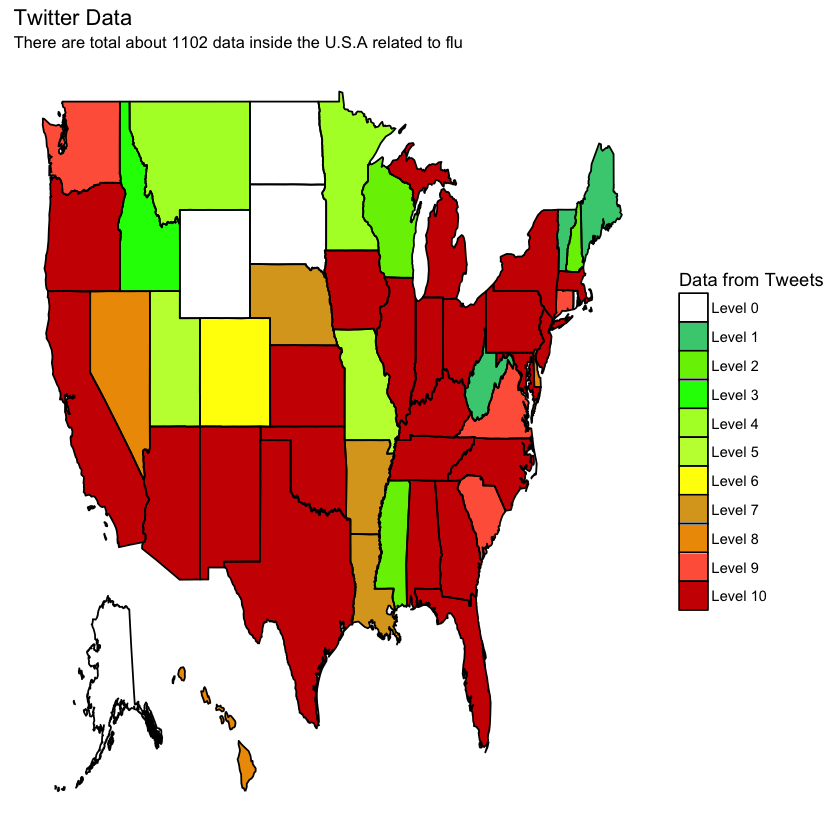

In [16]:
all_level <- c("Level 0", "Level 1", "Level 2", "Level 3", "Level 4", "Level 5", "Level 6", "Level 7", "Level 8", 
                     "Level 9", "Level 10")
pairs <- c("Level 0" = "white", "Level 1" = "#43CD80", "Level 2" = "#76EE00", "Level 3" = "#00FF00", "Level 4" = "#ADFF2F",
           "Level 5"="#C0FF3E", "Level 6"="#FFFF00", "Level 7" = "#DAA520", "Level 8"="#EE9A00", "Level 9"= "#FF6347", "Level 10" ="#CD0000")

p <- ggplot(new_map, aes(x=long,y=lat,group=group)) + 
            geom_polygon(aes(fill= factor(Level))) + 
            expand_limits(x = fifty_states$long, y = fifty_states$lat) + geom_path() +
            scale_fill_manual(name = "Data from Tweets", limits = all_level, values = pairs)
           

p <- p + theme(panel.border = element_blank()) + 
        theme(panel.background = element_blank()) +
        theme(axis.ticks = element_blank()) + 
        theme(axis.text = element_blank()) + labs(x = NULL, y = NULL) +
        theme(legend.key = element_rect(fill = pairs, colour = "black"))
p <- p + labs(title = "Twitter Data", subtitle = "There are total about 1102 data inside the U.S.A related to flu ")        
            
p

png(filename="part3_outputGraphs/part3_tweets.png")
plot(p)
dev.off()